Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
top_dir = '/content/gdrive/MyDrive/Melanoma Detection Assignment'
data_dir_train = pathlib.Path(top_dir + '/Train')
data_dir_test = pathlib.Path(top_dir + '/Test')
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
print("Training Image Count : {}".format(image_count_train))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test Image Count : {}".format(image_count_test))

print("Total Number of  Image Count : {}".format(image_count_test+image_count_train))

Training Image Count : 2239
Test Image Count : 118
Total Number of  Image Count : 2357


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print('\n'.join(class_names))

actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

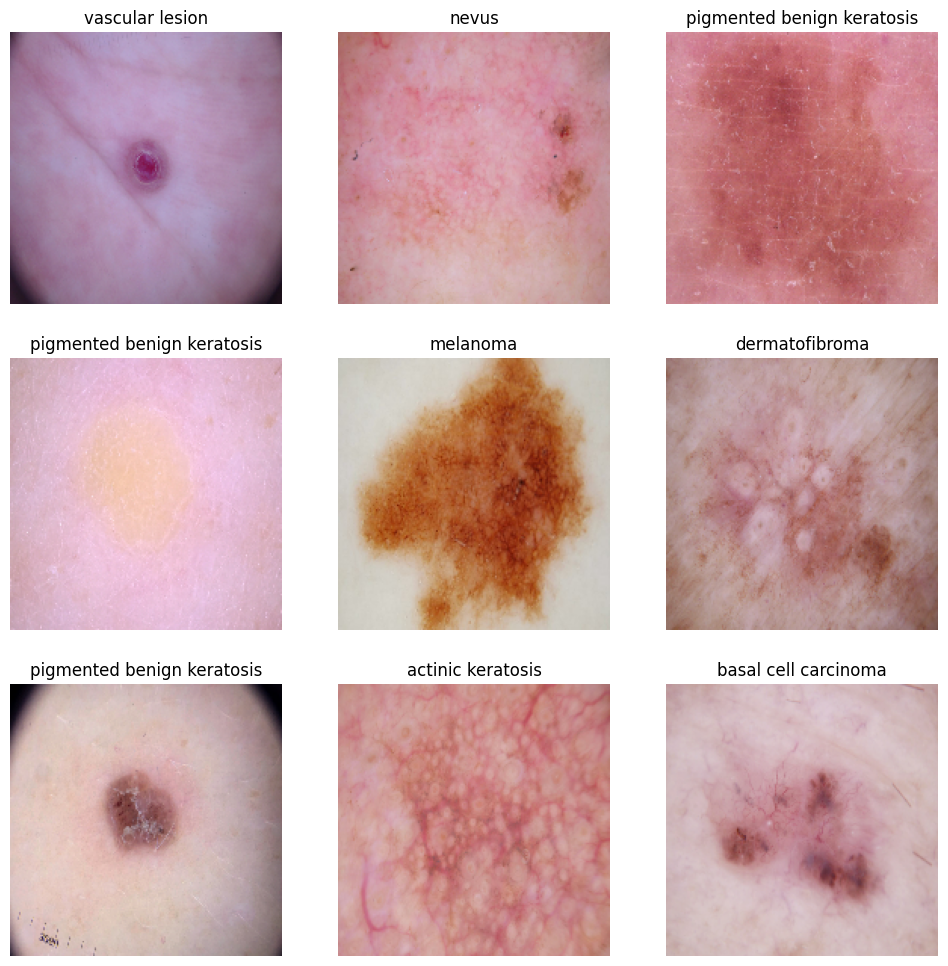

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
# We could have used softmax as well as it is multi classification problem

### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

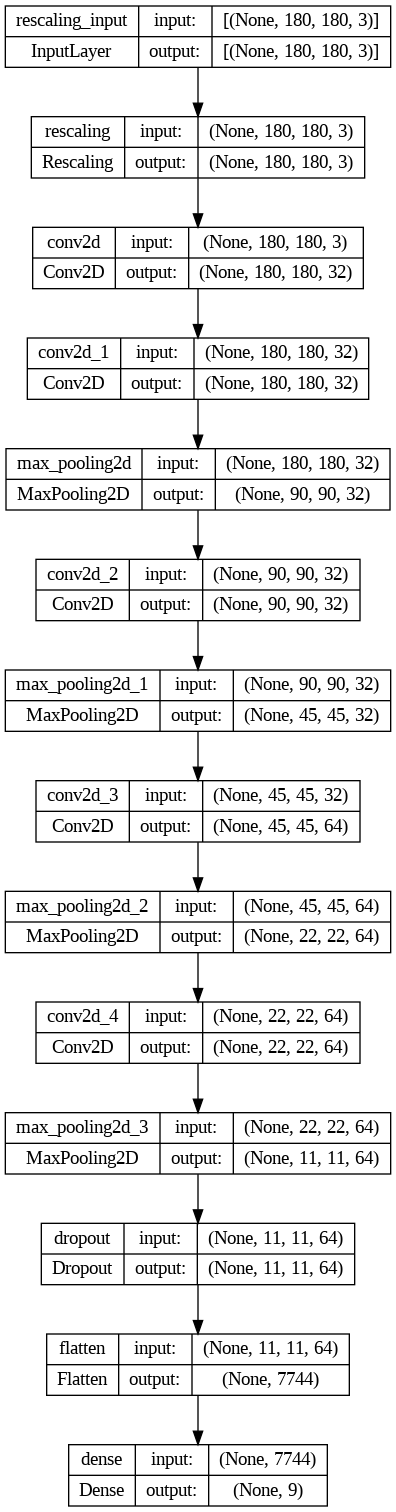

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Train the model

In [18]:
epochs = 20
batch_size = 32


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 122s 2s/step - loss: 2.0496 - accuracy: 0.2037 - val_loss: 2.0268 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0282 - accuracy: 0.2059 - val_loss: 2.0677 - val_accuracy: 0.2237
Epoch 3/20
56/56 [==============================] - 5s 89ms/step - loss: 1.8899 - accuracy: 0.2891 - val_loss: 1.8081 - val_accuracy: 0.2953
Epoch 4/20
56/56 [==============================] - 5s 87ms/step - loss: 1.7513 - accuracy: 0.3544 - val_loss: 1.6600 - val_accuracy: 0.4183
Epoch 5/20
56/56 [==============================] - 5s 87ms/step - loss: 1.6476 - accuracy: 0.4074 - val_loss: 1.6102 - val_accuracy: 0.4116
Epoch 6/20
56/56 [==============================] - 5s 89ms/step - loss: 1.5730 - accuracy: 0.4235 - val_loss: 1.5312 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 5s 87ms/step - loss: 1.5281 - accuracy: 0.4503 - val_loss: 1.5547 - val_accuracy: 0.4340
Epoch 8/20
56

### Visualizing training results

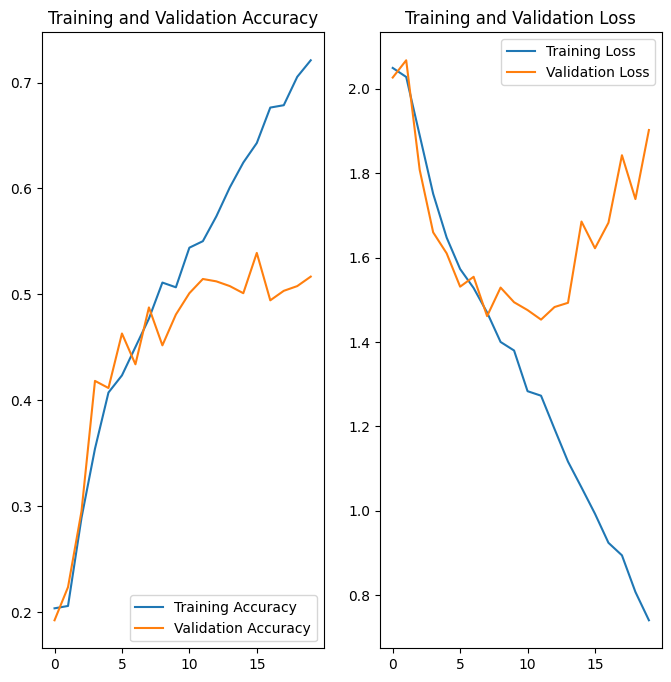

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


As you can see on the 8th to 10th epochs loss is increasing in training & test . So the model is overfitting.

The accuracy is just around 70% because there are enough features to remember the pattern.

We may not be able to advise on  the overfitting & underfitting yet 

### Write your findings here

In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 23ms/step - loss: 1.9024 - accuracy: 0.5168
Accuracy:  0.8102678656578064
Validation Accuracy:  0.5167785286903381
Loss:  0.5437661409378052
Validation Loss 1.902448058128357


###  we can clearly see that model Overfit as the Training Accuracy and the Validation accuracy is not in the same rage. 

Accuracy:  0.8102678656578064

Validation Accuracy:  0.5167785286903381

Loss:  0.5437661409378052

Validation Loss : 1.902448058128357


In [31]:

data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

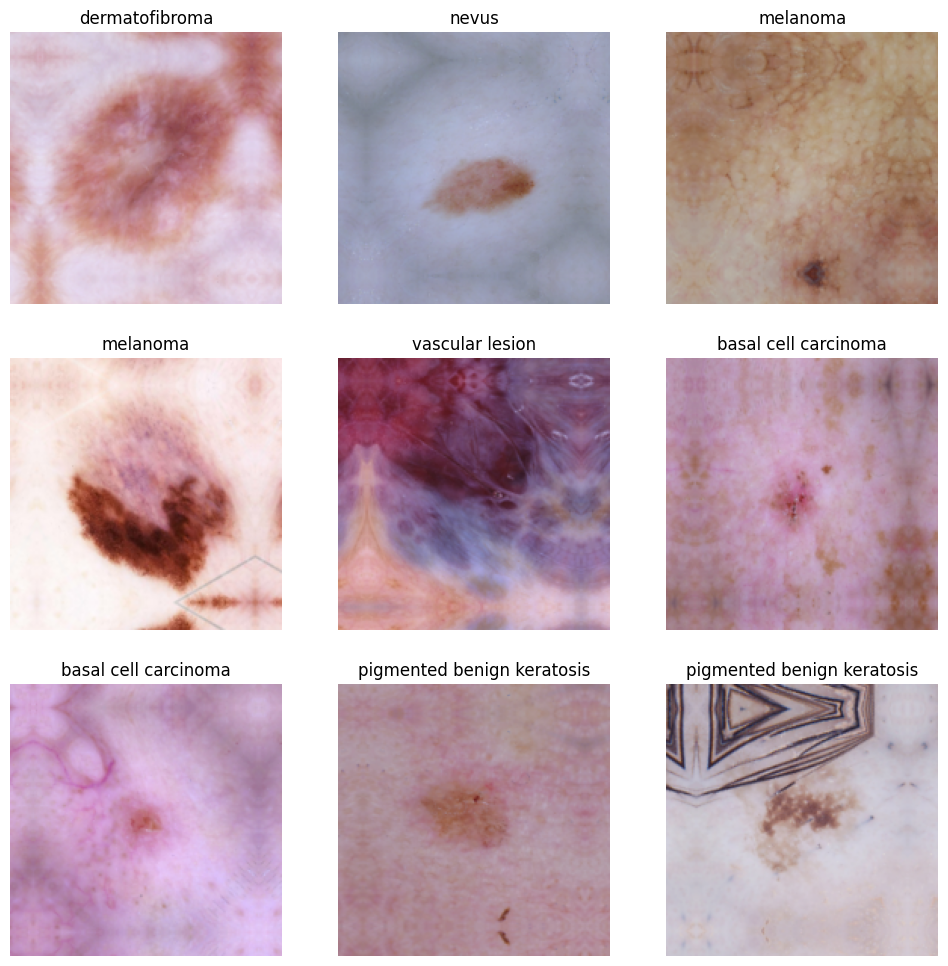

In [32]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [33]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [34]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [35]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 64)        51264     
                                                      

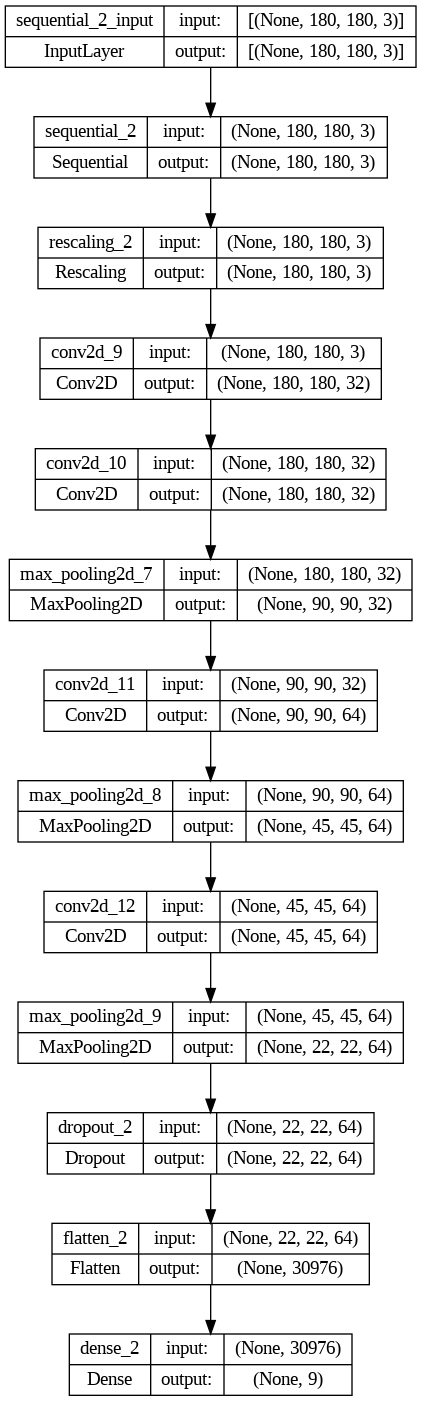

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Training the model

In [37]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code

epochs = 20
batch_size = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 9s 102ms/step - loss: 2.0530 - accuracy: 0.2009 - val_loss: 2.0239 - val_accuracy: 0.2013
Epoch 2/20
56/56 [==============================] - 5s 98ms/step - loss: 1.9336 - accuracy: 0.2600 - val_loss: 1.8966 - val_accuracy: 0.2886
Epoch 3/20
56/56 [==============================] - 6s 100ms/step - loss: 1.9133 - accuracy: 0.2679 - val_loss: 1.8990 - val_accuracy: 0.2819
Epoch 4/20
56/56 [==============================] - 6s 99ms/step - loss: 1.8082 - accuracy: 0.3220 - val_loss: 1.8919 - val_accuracy: 0.2640
Epoch 5/20
56/56 [==============================] - 6s 98ms/step - loss: 1.7874 - accuracy: 0.3454 - val_loss: 1.7004 - val_accuracy: 0.3893
Epoch 6/20
56/56 [==============================] - 5s 96ms/step - loss: 1.6859 - accuracy: 0.3850 - val_loss: 1.5826 - val_accuracy: 0.4698
Epoch 7/20
56/56 [==============================] - 5s 97ms/step - loss: 1.6405 - accuracy: 0.4079 - val_loss: 1.6866 - val_accuracy: 0.3893
Epoch 8/20


### Visualizing the results

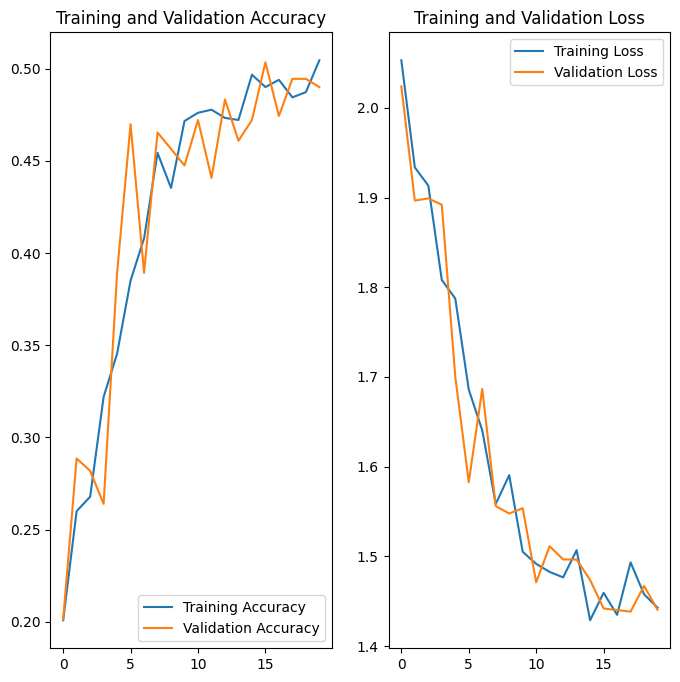

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 21ms/step - loss: 1.4405 - accuracy: 0.4899
Accuracy:  0.5044642686843872
Validation Accuracy:  0.4899328947067261
Loss:  1.4007394313812256
Validation Loss 1.4404832124710083


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Overfitting seems to be not there after that data agumentation 

Accuracy has reduced around 50%

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [40]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df_imbalance = class_distribution_count(data_dir_train)
df_imbalance

,Class,No. of Image
0,actinic keratosis,114
1,dermatofibroma,95
2,basal cell carcinoma,376
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

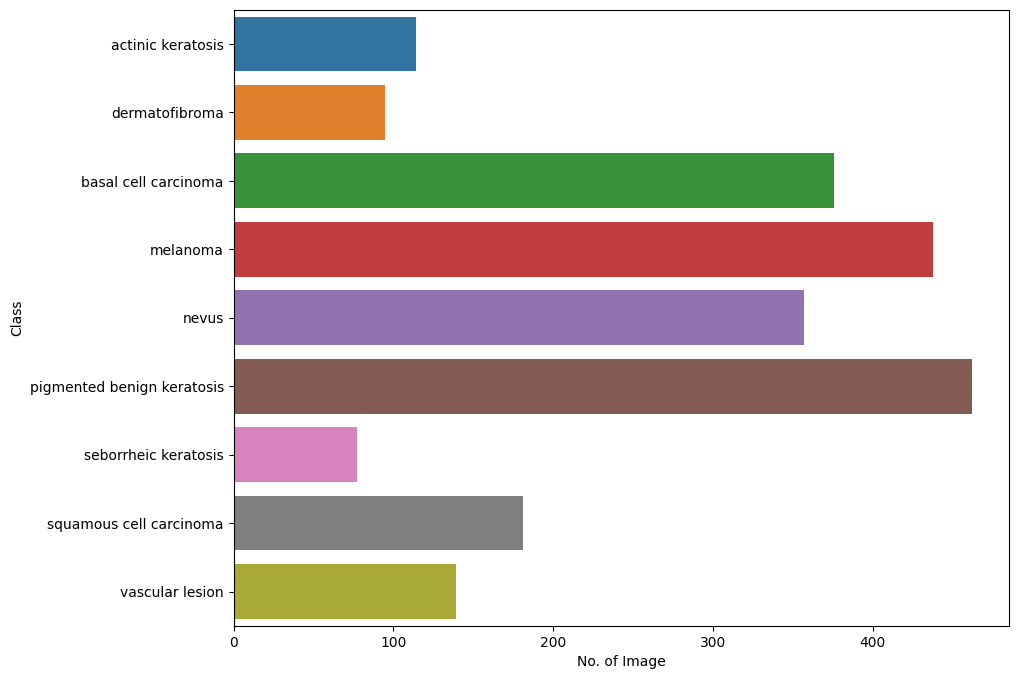

In [41]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df_imbalance,
            label="Class")

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? 
seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
melanoma and pigmented benign keratosis have proprtionate number of classes



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [42]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

path_to_training_dataset="/content/gdrive/MyDrive/Melanoma Detection Assignment/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF99819BEB0>: 100%|██████████| 500/500 [00:20<00:00, 24.92 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF9981CA0D0>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFA4C381940>: 100%|██████████| 500/500 [00:21<00:00, 23.78 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FFA3C3DBCD0>: 100%|██████████| 500/500 [01:50<00:00,  4.52 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7FFADC272040>: 100%|██████████| 500/500 [01:24<00:00,  5.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FFA4C07AC40>: 100%|██████████| 500/500 [00:21<00:00, 23.46 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FFA40C96820>: 100%|██████████| 500/500 [00:46<00:00, 10.85 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFA4C3E0F70>: 100%|██████████| 500/500 [00:20<00:00, 24.65 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFADCA8C940>: 100%|██████████| 500/500 [00:21<00:00, 22.82 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [53]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [54]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Melanoma Detection Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026040.jpg_c32c6a0c-8c9d-4f81-bc54-02c82d21185f.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026709.jpg_d2330d31-a30c-4054-82e4-7f196a401a77.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029309.jpg_3aac6f03-26c1-4e66-8c8f-b582d0dfea20.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027829.jpg_da0f9e72-f8a2-4046-985f-acf8a56e3363.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025957.jpg_08b633dd-67b0-42c5-bfac-2c94d436f55a.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026040.jpg

In [55]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [56]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [57]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [58]:
new_df['Label'].value_counts()

actinic keratosis             500
dermatofibroma                500
basal cell carcinoma          500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [59]:
top_dir = '/content/gdrive/MyDrive/Melanoma Detection Assignment'
data_dir_train = pathlib.Path(top_dir + '/Train')
data_dir_test = pathlib.Path(top_dir + '/Test')
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))

In [61]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer Detection /Train/output")
data_dir_train1=pathlib.Path("/content/gdrive/MyDrive/Melanoma Detection Assignment/Train")

In [63]:
image_count_train1 = len(list(data_dir_train1.glob('*/*/*.jpg')))
print(image_count_train1)

4500


In [64]:
#data_dir_train="path to directory with training data + data created using augmentor"
print(data_dir_train)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

/content/gdrive/MyDrive/Melanoma Detection Assignment/Train
Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [65]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [66]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [67]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [68]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 32)      2432      
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

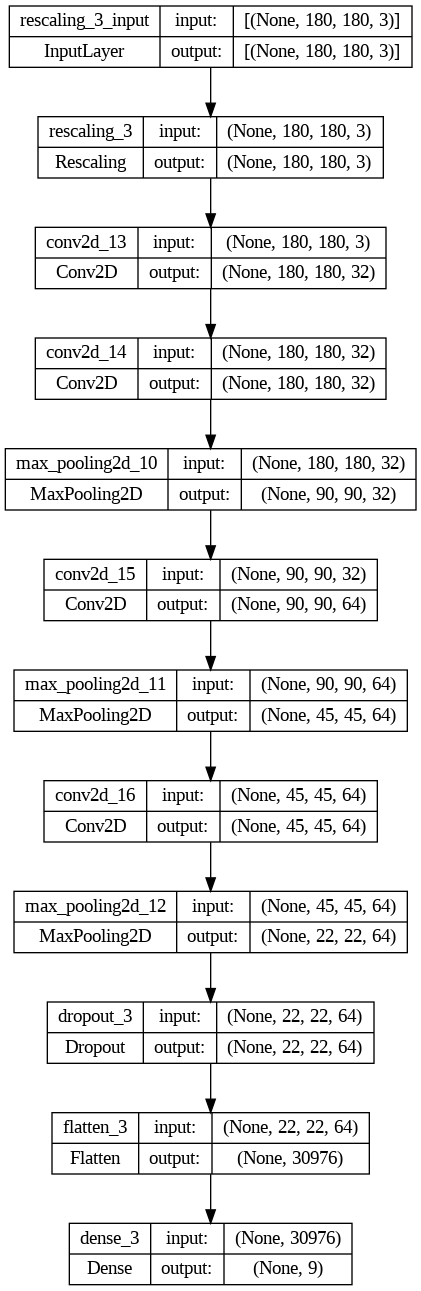

In [69]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### **Todo:**  Train your model

In [70]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
540/540 [==============================] - 46s 80ms/step - loss: 2.0275 - accuracy: 0.2188 - val_loss: 2.1716 - val_accuracy: 0.2294
Epoch 2/30
540/540 [==============================] - 39s 71ms/step - loss: 1.7267 - accuracy: 0.3481 - val_loss: 1.6240 - val_accuracy: 0.3883
Epoch 3/30
540/540 [==============================] - 42s 77ms/step - loss: 1.6582 - accuracy: 0.3691 - val_loss: 1.9099 - val_accuracy: 0.2910
Epoch 4/30
540/540 [==============================] - 39s 71ms/step - loss: 1.4770 - accuracy: 0.4388 - val_loss: 1.3382 - val_accuracy: 0.4774
Epoch 5/30
540/540 [==============================] - 42s 76ms/step - loss: 1.3225 - accuracy: 0.4996 - val_loss: 1.2661 - val_accuracy: 0.5234
Epoch 6/30
540/540 [==============================] - 38s 71ms/step - loss: 1.1806 - accuracy: 0.5625 - val_loss: 1.1557 - val_accuracy: 0.5857
Epoch 7/30
540/540 [==============================] - 39s 71ms/step - loss: 1.0500 - accuracy: 0.6183 - val_loss: 1.1343 - val_accuracy:

#### **Todo:**  Visualize the model results

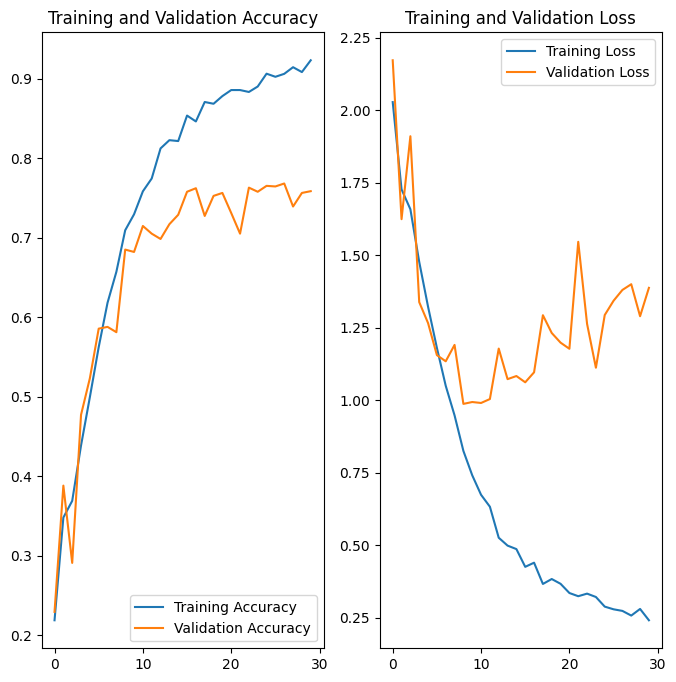

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

135/135 [==============================] - 8s 54ms/step - loss: 1.3874 - accuracy: 0.7587
Accuracy:  0.9445474743843079
Validation Accuracy:  0.7587230801582336
Loss:  0.17755134403705597
Validation Loss 1.3874183893203735


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


Accuracy has been increased to 94% on training data has increased by using Augmentor library.

Model is still overfitting from 10th Epoch

I beleive the overfitting can be solved by add more layer,neurons or adding dropout layers. Also 
tuning the hyperparameter


In [80]:
import matplotlib
print("Tensor Flow Version : {}".format(tf.__version__))
print("Keras Flow Version  : {}".format(keras.__version__))
print("Pandas Version      : {}".format(pd.__version__))
print("Numpy  Version      : {}".format(np.__version__))
print("Seaborn Version     : {}".format(sns.__version__))
print("Matplotlib Version  : {}".format(matplotlib.__version__))

Tensor Flow Version : 2.12.0
Keras Flow Version  : 2.12.0
Pandas Version      : 1.4.4
Numpy  Version      : 1.22.4
Seaborn Version     : 0.12.2
Matplotlib Version  : 3.7.1
